In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [268]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [269]:
conso_file = r"Y:\Documents\conso.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249398 entries, 0 to 249397
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  249398 non-null  int64  
 1   kWh       249398 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.8 MB


<Axes: >

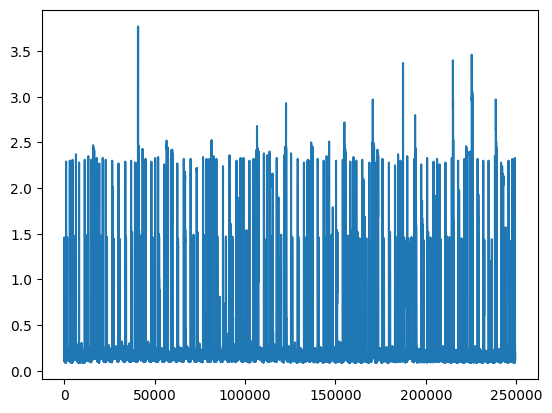

In [270]:
conso_data['kWh'].plot()

In [271]:
l=len(conso_data)-1
l

249397

In [272]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [273]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
249393,29073,0.12,29.073,123.826231,5987194339
249394,28684,0.12,28.684,125.505508,5987223023
249395,29458,0.12,29.458,122.207889,5987252481
249396,29534,0.12,29.534,121.893411,5987282015
249397,28924,0.12,28.924,124.464113,5987310939


In [274]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

5987310939000

In [275]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2024, 3, 7, 2, 1, 56, 695139)

In [276]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 02:02:22.984139,07/03/24
1,26243,0.14,26.243,137.179438,52532,2024-03-07 02:02:49.227139,07/03/24
2,25885,0.14,25.885,139.076685,78417,2024-03-07 02:03:15.112139,07/03/24
3,25754,0.14,25.754,139.784111,104171,2024-03-07 02:03:40.866139,07/03/24
4,25774,0.14,25.774,139.675642,129945,2024-03-07 02:04:06.640139,07/03/24
...,...,...,...,...,...,...,...
249393,29073,0.12,29.073,123.826231,5987194339,2024-05-15 09:08:31.034139,15/05/24
249394,28684,0.12,28.684,125.505508,5987223023,2024-05-15 09:08:59.718139,15/05/24
249395,29458,0.12,29.458,122.207889,5987252481,2024-05-15 09:09:29.176139,15/05/24
249396,29534,0.12,29.534,121.893411,5987282015,2024-05-15 09:09:58.710139,15/05/24


In [277]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, month, year


('15/05/24', 5, 2024)

In [278]:
here = now.strftime('%H:%M:%S')
here

'09:10:32'

In [279]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [280]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
248328,18222,0.20,18.222,197.563385,5954285098,2024-05-15 00:00:01.793139,15/05/24
248329,18270,0.20,18.270,197.044335,5954303368,2024-05-15 00:00:20.063139,15/05/24
248330,17958,0.20,17.958,200.467758,5954321326,2024-05-15 00:00:38.021139,15/05/24
248331,17348,0.21,17.348,207.516717,5954338674,2024-05-15 00:00:55.369139,15/05/24
248332,17731,0.20,17.731,203.034234,5954356405,2024-05-15 00:01:13.100139,15/05/24
...,...,...,...,...,...,...,...
249393,29073,0.12,29.073,123.826231,5987194339,2024-05-15 09:08:31.034139,15/05/24
249394,28684,0.12,28.684,125.505508,5987223023,2024-05-15 09:08:59.718139,15/05/24
249395,29458,0.12,29.458,122.207889,5987252481,2024-05-15 09:09:29.176139,15/05/24
249396,29534,0.12,29.534,121.893411,5987282015,2024-05-15 09:09:58.710139,15/05/24


In [281]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [282]:
data = list(df_grp['kWh'])
print(data)


[3.063, 3.794, 3.082, 3.531, 4.539, 3.562, 3.548, 3.641, 3.569, 3.347, 3.361, 4.402, 3.509, 3.441, 3.552, 3.734, 3.533, 3.344, 3.889, 3.417, 3.463, 3.638, 3.769, 3.655, 3.831, 3.834, 3.818, 3.421, 3.474, 4.414, 3.405, 4.076, 3.779, 4.061, 3.426, 3.575, 3.443, 4.129, 3.268, 3.316, 3.707, 3.689, 4.225, 3.277, 3.386, 3.761, 4.08, 3.513, 3.302, 3.285, 3.066, 3.746, 3.819, 3.783, 3.41, 3.449, 3.518, 3.266, 3.606, 3.418, 3.337, 3.538, 3.655, 3.179, 3.1, 3.403, 3.597, 4.029, 3.531, 1.07]


In [283]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [284]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(15, 7)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()


In [285]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.330511
dtype: float64

In [286]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.562829
dtype: float64

In [287]:
last=df_grp.iloc[-1]['kWh']
last

1.07

In [288]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:1,18222,0.20,18.222,197.563385,5954285098,2024-05-15 00:00:01.793139,15/05/24
0:0:20,18270,0.20,18.270,197.044335,5954303368,2024-05-15 00:00:20.063139,15/05/24
0:0:38,17958,0.20,17.958,200.467758,5954321326,2024-05-15 00:00:38.021139,15/05/24
0:0:55,17348,0.21,17.348,207.516717,5954338674,2024-05-15 00:00:55.369139,15/05/24
0:1:13,17731,0.20,17.731,203.034234,5954356405,2024-05-15 00:01:13.100139,15/05/24
...,...,...,...,...,...,...,...
9:8:31,29073,0.12,29.073,123.826231,5987194339,2024-05-15 09:08:31.034139,15/05/24
9:8:59,28684,0.12,28.684,125.505508,5987223023,2024-05-15 09:08:59.718139,15/05/24
9:9:29,29458,0.12,29.458,122.207889,5987252481,2024-05-15 09:09:29.176139,15/05/24


In [289]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:1',
             days  kWh
  heure               
  0:0:1  15/05/24  0.2),
 ('0:0:20',
              days  kWh
  heure                
  0:0:20  15/05/24  0.2),
 ('0:0:38',
              days  kWh
  heure                
  0:0:38  15/05/24  0.2),
 ('0:0:55',
              days   kWh
  heure                 
  0:0:55  15/05/24  0.21),
 ('0:1:13',
              days  kWh
  heure                
  0:1:13  15/05/24  0.2),
 ('0:1:30',
              days  kWh
  heure                
  0:1:30  15/05/24  0.2),
 ('0:1:49',
              days  kWh
  heure                
  0:1:49  15/05/24  0.2),
 ('0:2:7',
             days  kWh
  heure               
  0:2:7  15/05/24  0.2),
 ('0:2:25',
              days  kWh
  heure                
  0:2:25  15/05/24  0.2),
 ('0:2:44',
              days   kWh
  heure                 
  0:2:44  15/05/24  0.19),
 ('0:3:2',
             days   kWh
  heure                
  0:3:2  15/05/24  0.19),
 ('0:3:21',
              days   kWh
  heure             

In [290]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:1',
  heure
  0:0:1    0.2
  Name: kWh, dtype: float64),
 ('0:0:20',
  heure
  0:0:20    0.2
  Name: kWh, dtype: float64),
 ('0:0:38',
  heure
  0:0:38    0.2
  Name: kWh, dtype: float64),
 ('0:0:55',
  heure
  0:0:55    0.21
  Name: kWh, dtype: float64),
 ('0:1:13',
  heure
  0:1:13    0.2
  Name: kWh, dtype: float64),
 ('0:1:30',
  heure
  0:1:30    0.2
  Name: kWh, dtype: float64),
 ('0:1:49',
  heure
  0:1:49    0.2
  Name: kWh, dtype: float64),
 ('0:2:7',
  heure
  0:2:7    0.2
  Name: kWh, dtype: float64),
 ('0:2:25',
  heure
  0:2:25    0.2
  Name: kWh, dtype: float64),
 ('0:2:44',
  heure
  0:2:44    0.19
  Name: kWh, dtype: float64),
 ('0:3:2',
  heure
  0:3:2    0.19
  Name: kWh, dtype: float64),
 ('0:3:21',
  heure
  0:3:21    0.19
  Name: kWh, dtype: float64),
 ('0:3:39',
  heure
  0:3:39    0.19
  Name: kWh, dtype: float64),
 ('0:3:58',
  heure
  0:3:58    0.19
  Name: kWh, dtype: float64),
 ('0:4:16',
  heure
  0:4:16    0.19
  Name: kWh, dtype: float64),
 ('0:4:35

In [291]:
# premier kWh
df.iloc[1000]['dates']

Timestamp('2024-05-15 08:42:29.098139')

In [292]:
df.iloc[0].dates

Timestamp('2024-05-15 00:00:01.793139')

In [293]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start

    #df.iloc[1001:2000]['dates']#.tail(1)
    print(f'{start}\t{end}\t{period}\t{conso}')


In [294]:
# premier kWh
period()

2024-05-15 00:00:01.793139	2024-05-15 08:42:00.636139	0 days 08:41:58.843000	1000


In [295]:
# 2ème kWh
p = 2
if len(df)>(p-1)*1000:
    period(p)

2024-05-15 08:42:00.636139	2024-05-15 09:10:27.634139	0 days 00:28:26.998000	70


In [296]:
# 3ème kWh
p = 3
if len(df)>(p-1)*1000:
    period(p)

In [297]:
# 4ème kWh
p = 4
if len(df)>(p-1)*1000:
    period(p)

In [298]:
for p in range(1,6):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-05-15 00:00:01.793139	2024-05-15 08:42:00.636139	0 days 08:41:58.843000	1000
2024-05-15 08:42:00.636139	2024-05-15 09:10:27.634139	0 days 00:28:26.998000	70


In [299]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('09:10:32', 1.07, 1070)

In [300]:
df_grp.tail(7)

,kWh
days,
09/05/24,3.179
10/05/24,3.100
11/05/24,3.403
12/05/24,3.597
13/05/24,4.029
14/05/24,3.531
15/05/24,1.070


In [301]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [302]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


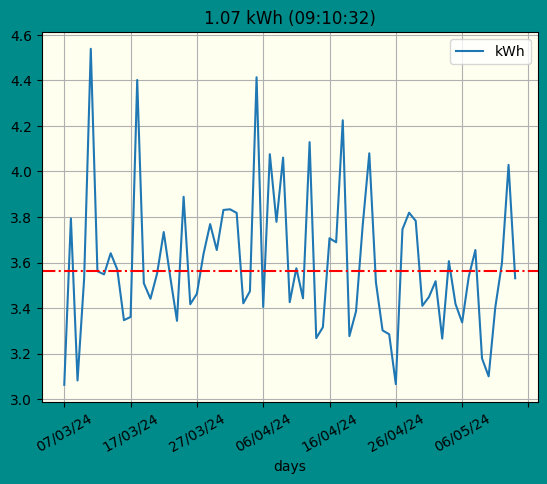

In [303]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

df_grp.iloc[:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


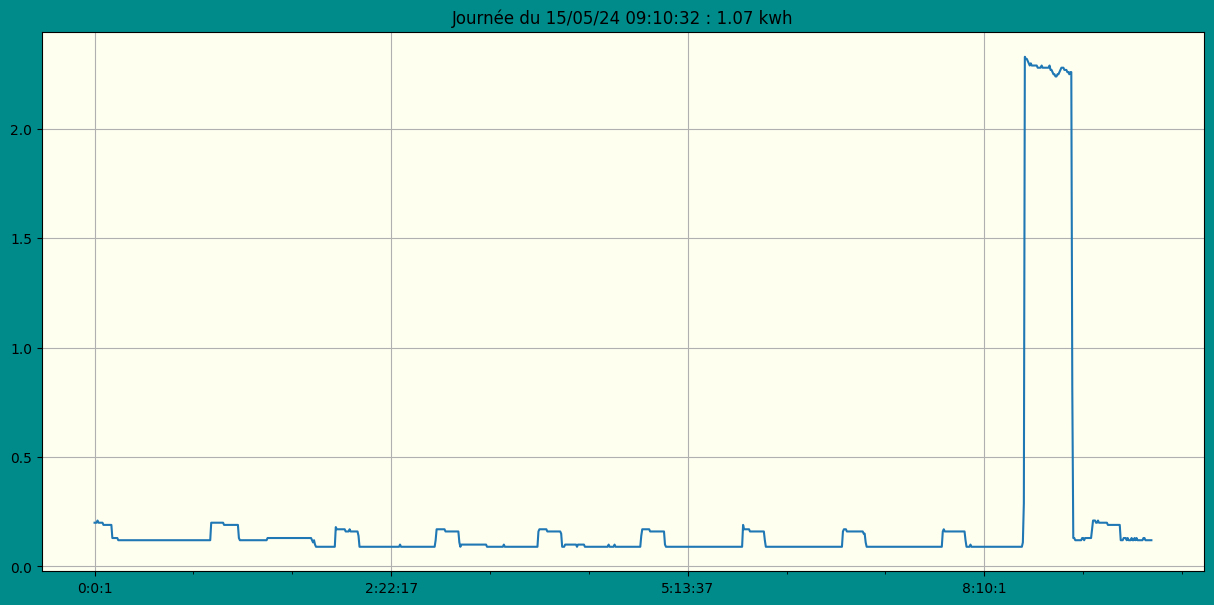

In [304]:
show(day,bgcolor='ivory')

In [305]:
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours#.info()

# group by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
groupedbyhour.count()


,kWh
hours,
00,137
01,127
02,105
03,106
04,104
05,103
06,102
07,101
08,163


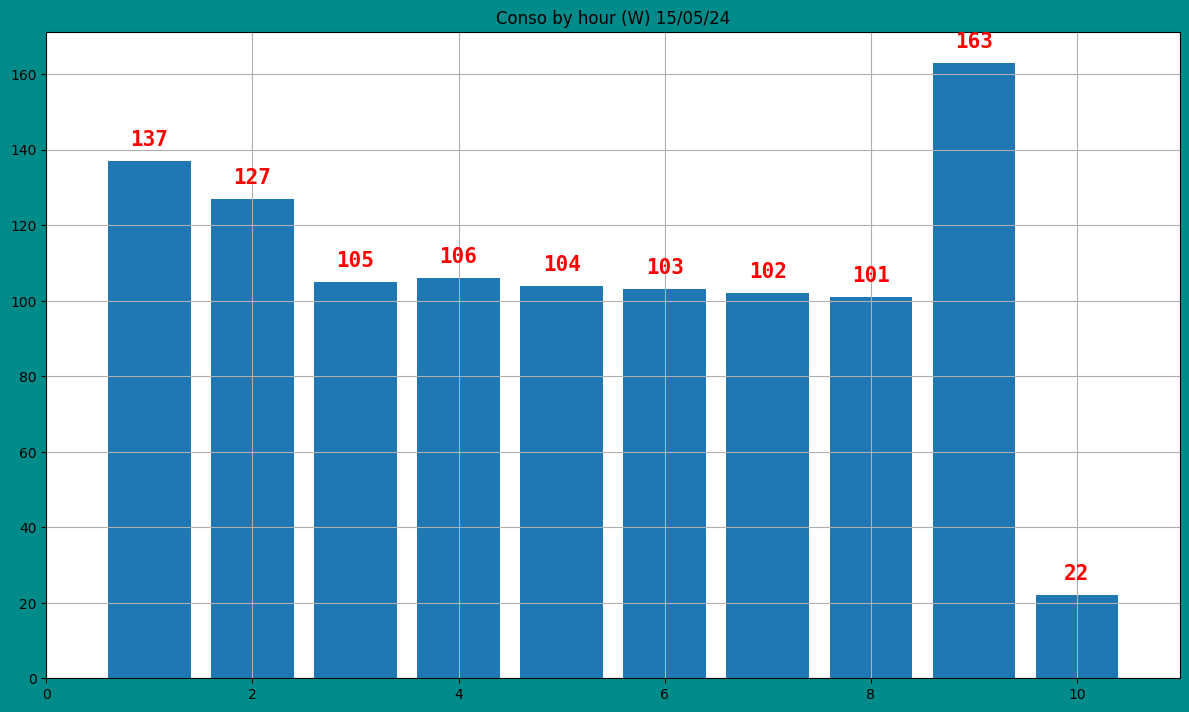

In [306]:
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)

#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(12, 7), facecolor='darkcyan')
data = groupedbyhour.count().kWh
plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=15, fontweight='bold', color='red'
    )


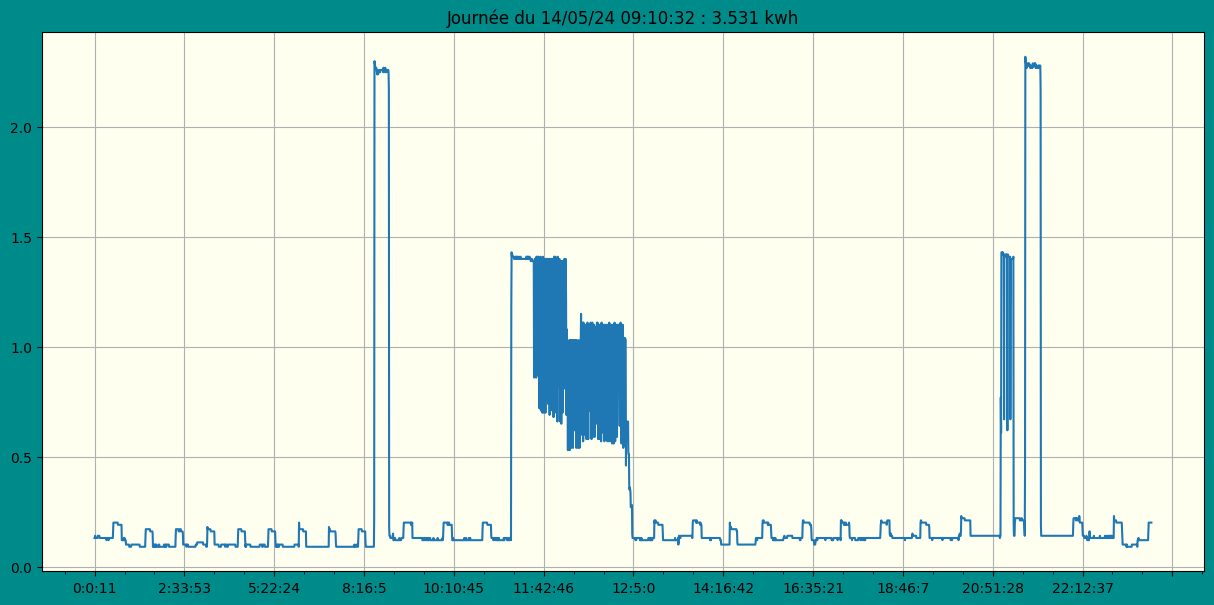

In [311]:
# plot any day
day = '14/05/24'
show(day,pltcolor='darkcyan')

In [308]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

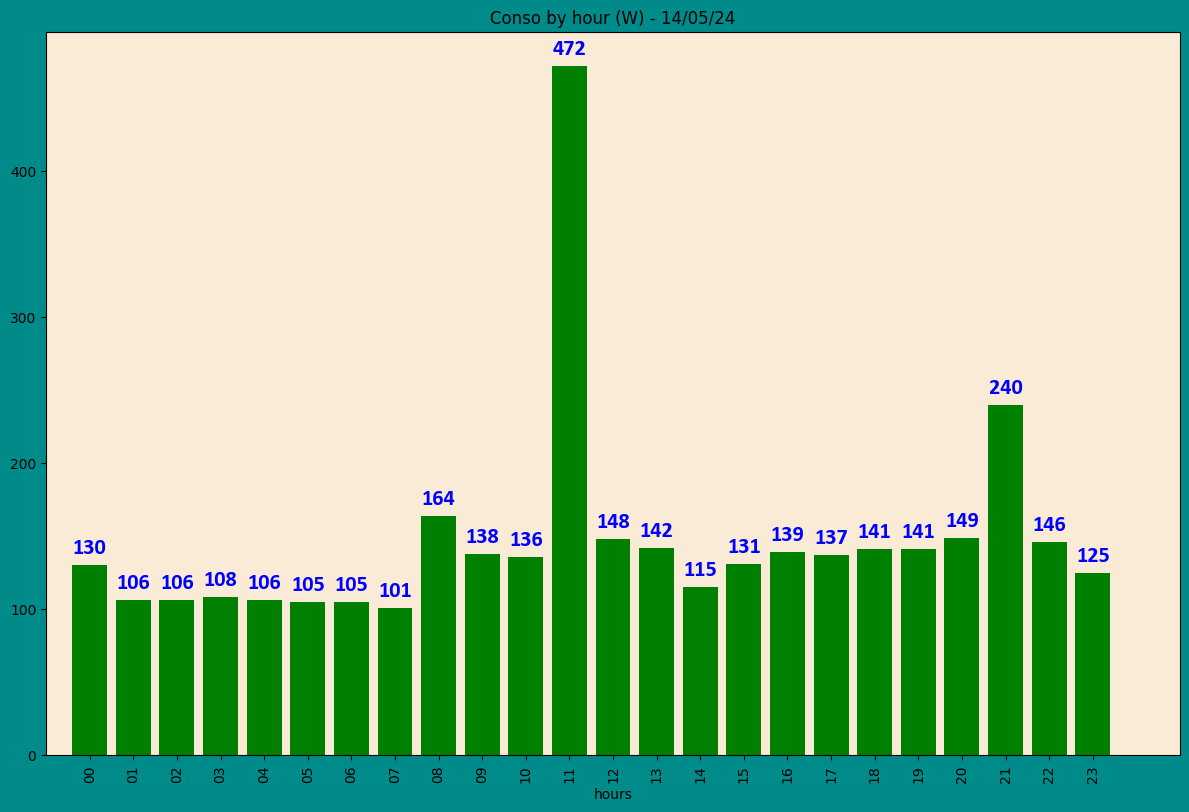

In [312]:
conso_byhour(day)

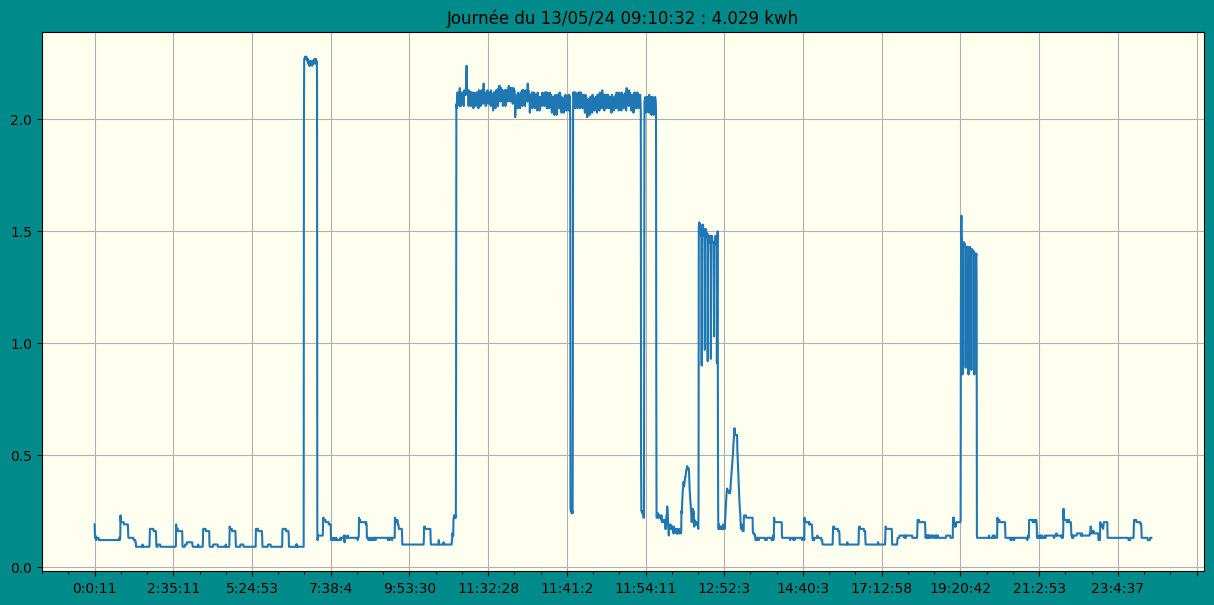

In [314]:
show('13/05/24')

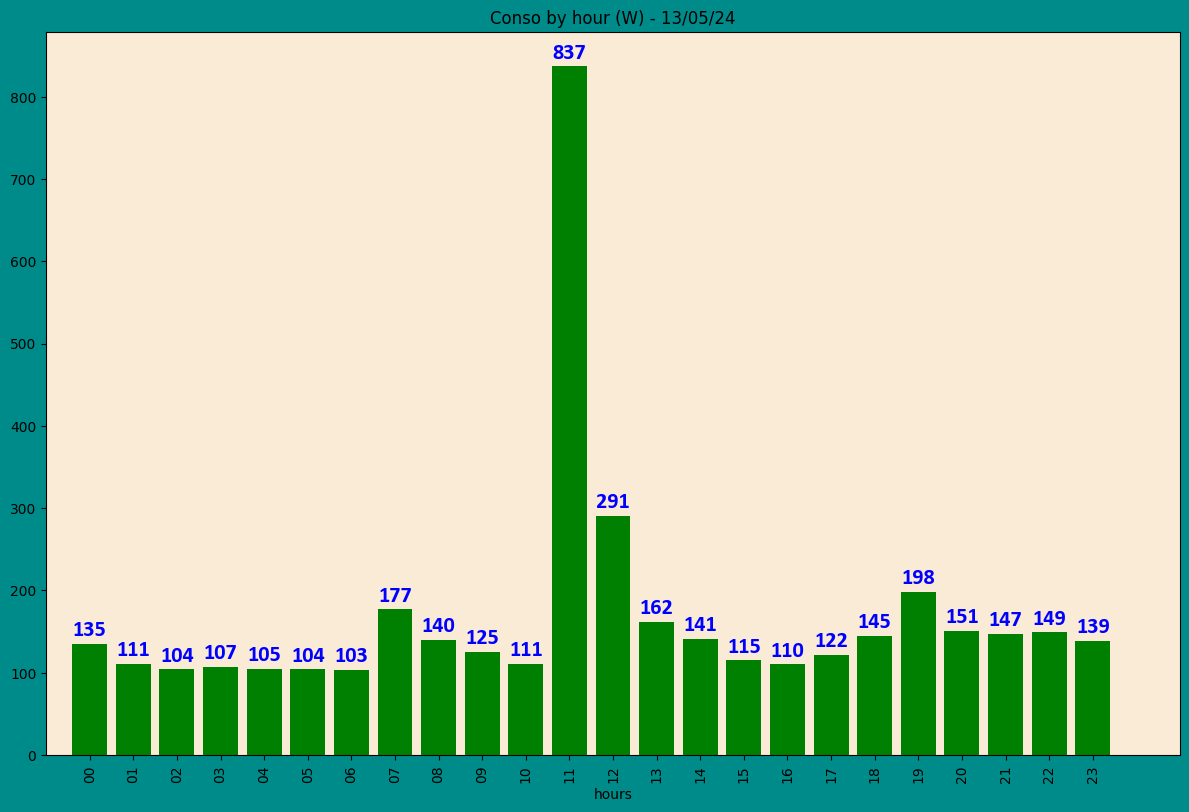

In [313]:
conso_byhour('13/05/24')